In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.cm as col
import warnings
warnings.filterwarnings("ignore")

# General Settings

In [2]:
max_err=0.2

S = 20000
B = 312858

plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
#plt.rcParams['text.usetex'] = True
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.frameon'] = False
#plt.rcParams['lines.dashed_pattern'] = (1, 3)

In [3]:
colormap_normal = col.get_cmap("viridis")
col_bas = "black"

col_bas_sup = "b"
col_ex1 = "r"
col_ex2 = "orange"
col_ex3 = "dodgerblue"
col_ks = "purple"

# SIC curves

In [4]:
colormap_gaussian = col.get_cmap("viridis")
N=6
col_1G = 1/N
col_2G = 2/N
col_5G = 3/N
col_10G = 4/N
col_30G = 5/N
col_50G = 6/N

colormap_2D = "cividis"
global_xaxis = False

NN_runs="50"

## Functions

### Plot visual

In [5]:
def plot_start():
	plt.figure()
	#plt.grid()

def plot_end(name, ylim = None, set_xaxis = None, title=None): 
	plt.legend()
	
	if set_xaxis is None:
		set_xaxis = global_xaxis

	if set_xaxis:
		plt.xlim(-0.05,1.05)
	if ylim is not None:
		plt.ylim(0, ylim)

	if title is not None:
		ymin, ymax = plt.ylim()
		xmin, xmax = plt.xlim()
		plt.text(xmin + 0.05 * (xmax-xmin), ymin + 0.9 *(ymax-ymin) , title, size=plt.rcParams['axes.labelsize'], color='black')
	plt.ylabel(r"$\epsilon_S/\sqrt{\epsilon_B}$")
	plt.xlabel(r"$\epsilon_S$")
	plt.legend()
	plt.savefig("plots/sic_"+name+".pdf")
	print(plt.axis())
	plt.show()

### Plotting

In [6]:
def mean_and_percentiles(x_arrays,y_arrays,number=1000):
	x_values = np.linspace(0.01,1,number)
	y_values = np.zeros((len(y_arrays),len(x_values)))
	for j in range(len(y_arrays)):	
		y_values[j] = interp1d(x_arrays[j], y_arrays[j])(x_values)
	py = 1/y_values	
	y_mean = np.median(py,axis=0)
	#inds = np.argwhere(1/(x_values*S)+y_mean/B/4<0.2**2)[:,0]
	inds = np.argwhere(y_mean < 312858*max_err**2)[:,0]
	y_max = np.percentile(py,84,axis=0) 
	y_min = np.percentile(py,16,axis=0)
	return x_values[inds], y_mean[inds], y_min[inds], y_max[inds]

def plot_fn(tpr,fpr,color,label, linestyle, background=False, alpha=0.2):
    tpr_mean, fpr_mean, fpr_min, fpr_max= mean_and_percentiles(tpr,fpr)
    if not background:
        plt.plot(tpr_mean, tpr_mean*np.sqrt(fpr_mean), color=color,label=label, linestyle=linestyle)
        plt.fill_between(tpr_mean, tpr_mean*np.sqrt(fpr_min), tpr_mean*np.sqrt(fpr_max), alpha=alpha, facecolor=color)
    else:
        plt.plot(1/fpr_mean, tpr_mean/np.sqrt(1/fpr_mean), color=color,label=label, linestyle=linestyle)
        plt.fill_between(1/fpr_mean, tpr_mean/np.sqrt(1/fpr_min), tpr_mean/np.sqrt(1/fpr_max), alpha=alpha, facecolor=color)		
    return 

def import_and_plot(path, label=None, color="grey", folder="rocs/", N_runs =10, start_runs =0, alpha=0.2, linestyle='solid'):	
	#if label is None: 
	#	label=path
	fpr=np.load(folder+"fpr_"+path+".npy")[start_runs:start_runs+N_runs]
	print(fpr.shape)
	tpr=np.load(folder+"tpr_"+path+".npy")[start_runs:start_runs+N_runs]
	plot_fn(tpr,fpr,color,label, linestyle, alpha=alpha)
	return tpr,fpr

def import_and_plot_all(path, label=None, color="grey", folder="rocs/", N_runs =20, start_runs =0, alpha=0.2):	
	#if label is None: 
	#	label=path
	fpr=np.load(folder+"fpr_"+path+".npy")[start_runs:start_runs+N_runs]
	tpr=np.load(folder+"tpr_"+path+".npy")[start_runs:start_runs+N_runs]
	for i in range(len(tpr)):
		inds = np.argwhere(1/fpr[i] < 312858*max_err**2)[:,0]
		if i==0:
			plt.plot(tpr[i, inds],tpr[i, inds]/np.sqrt(fpr[i, inds]),color=color, alpha=alpha, label=label)
		else:
			plt.plot(tpr[i,inds],tpr[i,inds]/np.sqrt(fpr[i,inds]),color=color, alpha=alpha)
	return tpr,fpr

## Plots

(10, 14508)
(1, 14432)
(10, 21494)
(1, 41374)


(0.08224324324324325, 1.0437027027027026, 0.21607798570494263, 17.462362300196205)


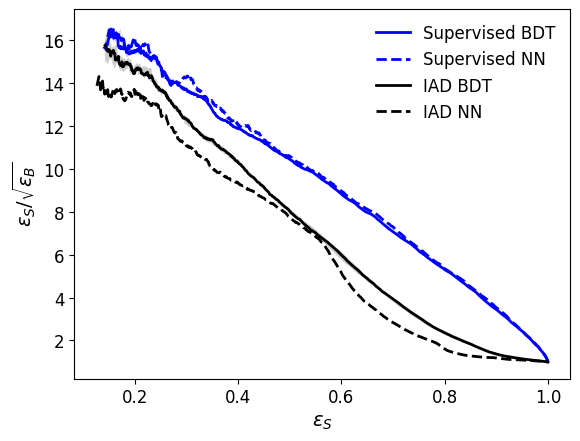

In [7]:
import_and_plot("roc_classifier_averaging", label="Supervised BDT",color=col_bas_sup,folder="/home/zu992399/PhD/BackToTheRoots/results/supervised_baseline_BDT/")
import_and_plot("50_temp", label="Supervised NN", color=col_bas_sup, N_runs=1, linestyle="dashed", folder="/home/zu992399/PhD/BackToTheRoots/results/supervised_baseline_NN/")
import_and_plot("roc_classifier_averaging", label="IAD BDT",color=col_bas,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_BDT/")
import_and_plot("50_temp", N_runs=1, label="IAD NN",color=col_bas, linestyle="dashed",folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_NN/")
name = "2p_BDT_NNens"+NN_runs+"_original4"
plot_end(name)

(1, 41374)
(1, 29292)
(1, 33504)
(1, 46018)
(1, 24534)
(-0.05, 1.05, 0.0, 40.15)


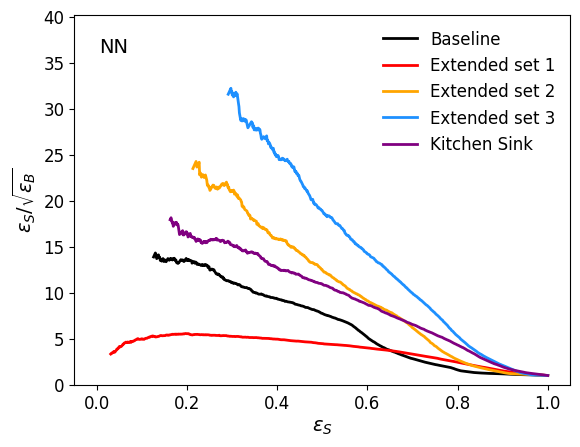

In [8]:
plot_start()
import_and_plot("50_temp", N_runs=1, label="Baseline",color=col_bas,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 1",color=col_ex1,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended1_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 2",color=col_ex2,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended2_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 3",color=col_ex3,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended3_NN/")
#import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_NN/", linestyle="dotted")
import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_super_NN/")
name = "2p_extended_NN_larger_ks"
plot_end(name, ylim=40.15, set_xaxis=True, title="NN")

(1, 41374)
(1, 29292)
(1, 33504)
(1, 46018)
(1, 31183)


(-0.05, 1.05, 0.0, 40.15)


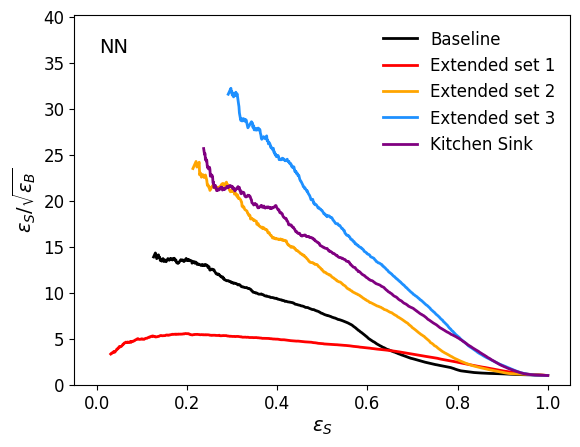

In [9]:
plot_start()
import_and_plot("50_temp", N_runs=1, label="Baseline",color=col_bas,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 1",color=col_ex1,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended1_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 2",color=col_ex2,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended2_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 3",color=col_ex3,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended3_NN/")
import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_NN/")
#import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_super_NN/")
name = "2p_extended_NN_smaller_ks"
plot_end(name, ylim=40.15, set_xaxis=True, title="NN")

(10, 21494)
(10, 17956)
(10, 14856)
(10, 12380)
(10, 14248)


(-0.05, 1.05, 0.0, 40.15)


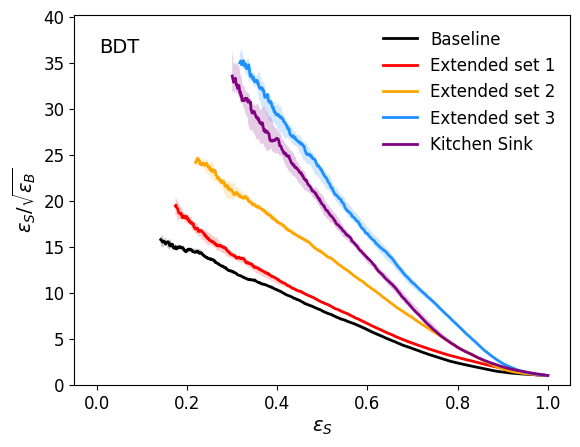

In [10]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 1",color=col_ex1,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended1_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended2_BDT/")
import_and_plot("roc_classifier_averaging",label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended3_BDT/")
#import_and_plot("roc_classifier_averaging",label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_fix_BDT/")
import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_super_BDT/")
name = "2p_extended_BDT_larger_ks"
plot_end(name, ylim=40.15, set_xaxis=True, title="BDT")

(10, 21494)
(10, 17956)
(10, 14856)
(10, 12380)
(10, 12774)


(-0.05, 1.05, 0.0, 40.15)


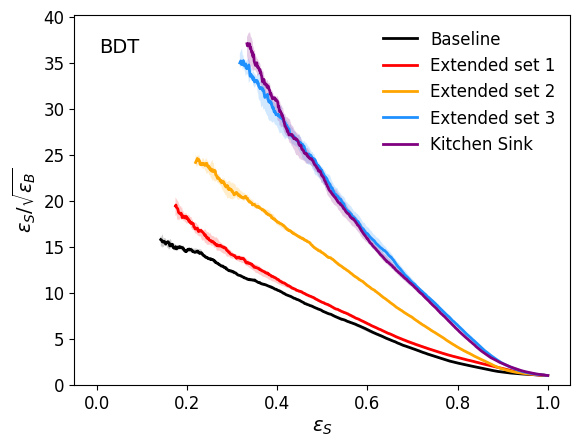

In [11]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 1",color=col_ex1,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended1_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended2_BDT/")
import_and_plot("roc_classifier_averaging",label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_extended3_BDT/")
import_and_plot("roc_classifier_averaging",label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_BDT/")
#import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_kitchensink_super_BDT/")
name = "2p_extended_BDT_smaller_ks"
plot_end(name, ylim=40.15, set_xaxis=True, title="BDT")

(10, 31359)
(10, 21718)
(10, 16678)
(10, 14246)
(10, 15274)


(-0.05, 1.05, 0.0, 30.15)


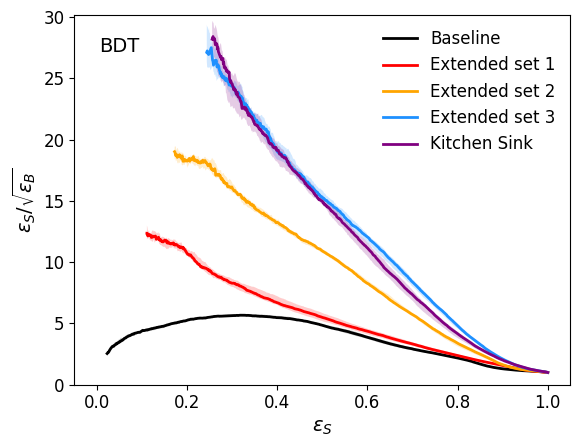

In [12]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_baseline_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 1",color=col_ex1, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended1_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended2_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended3_BDT/")
import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_BDT/")
#import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_super_BDT/")
name = "3p_extended_BDT_smaller_ks"
plot_end(name, ylim=30.15, set_xaxis=True, title="BDT")

(10, 31359)
(10, 21718)
(10, 16678)
(10, 14246)
(10, 16934)


(-0.05, 1.05, 0.0, 30.15)


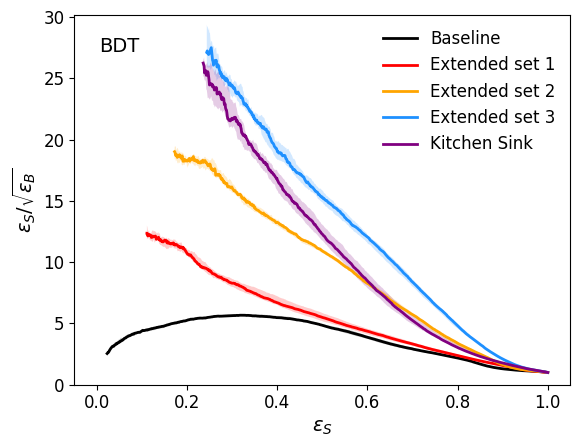

In [13]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_baseline_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 1",color=col_ex1, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended1_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended2_BDT/")
import_and_plot("roc_classifier_averaging", label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended3_BDT/")
#import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_BDT/")
import_and_plot("roc_classifier_averaging", label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_super_BDT/")
name = "3p_extended_BDT_larger_ks"
plot_end(name, ylim=30.15, set_xaxis=True, title="BDT")

(1, 93392)
(1, 35022)
(1, 37678)
(1, 57926)
(1, 26817)


(-0.05, 1.05, 0.0, 30.15)


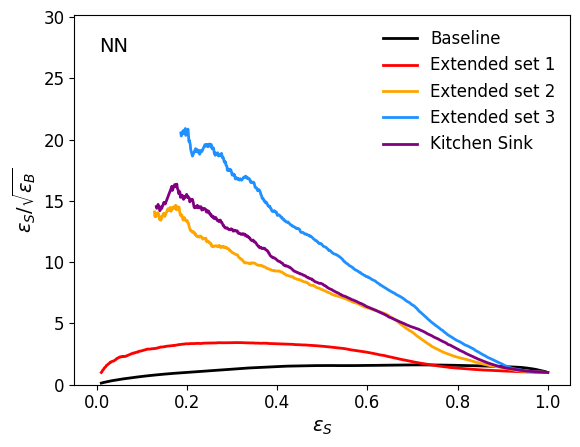

In [14]:
plot_start()
import_and_plot("50_temp", N_runs=1, label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_baseline_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 1",color=col_ex1, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended1_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended2_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended3_NN/")
#import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_NN/")
import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_super_NN/")
name = "3p_extended_NN_larger_ks"
plot_end(name, ylim=30.15, set_xaxis=True, title="NN")

(1, 93392)
(1, 35022)
(1, 37678)
(1, 57926)
(1, 34921)


(-0.05, 1.05, 0.0, 30.15)


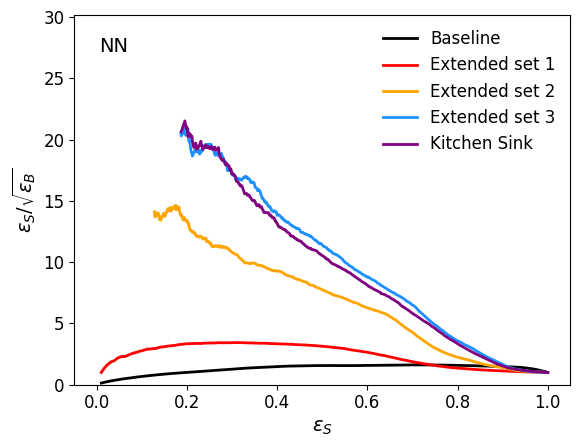

In [15]:
plot_start()
import_and_plot("50_temp", N_runs=1, label="Baseline",color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_baseline_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 1",color=col_ex1, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended1_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 2",color=col_ex2, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended2_NN/")
import_and_plot("50_temp", N_runs=1, label="Extended set 3",color=col_ex3, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_extended3_NN/")
import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_NN/")
#import_and_plot("50_temp", N_runs=1, label="Kitchen Sink",color=col_ks, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_3p_kitchensink_super_NN/")
name = "3p_extended_NN_smaller_ks"
plot_end(name, ylim=30.15, set_xaxis=True, title="NN")

(1, 41374)
(1, 28870)
(1, 34866)
(1, 37580)
(1, 41426)
(1, 43727)
(1, 43538)


(-0.05, 1.05, 0.0, 16.5)


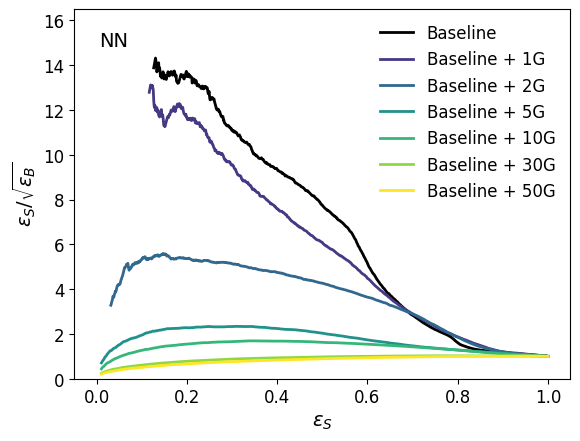

In [16]:
plot_start()
import_and_plot(NN_runs+"_temp", label="Baseline",N_runs=1, color=col_bas,folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 1G",N_runs=1,color=colormap_gaussian(col_1G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_1G_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 2G",N_runs=1,color=colormap_gaussian(col_2G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_2G_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 5G",N_runs=1,color=colormap_gaussian(col_5G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_5G_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 10G",N_runs=1,color=colormap_gaussian(col_10G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_10G_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 30G",N_runs=1,color=colormap_gaussian(col_30G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_30G_NN/")
import_and_plot(NN_runs+"_temp", label="Baseline + 50G",N_runs=1,color=colormap_gaussian(col_50G),folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_50G_NN/")
name="BDT_IAD_NN_G"
plot_end(name, ylim=16.5, set_xaxis=True, title="NN")

(10, 21494)
(10, 19662)
(10, 19626)
(10, 20016)
(10, 20898)
(10, 24662)
(10, 26058)
(-0.05, 1.05, 0.0, 16.5)


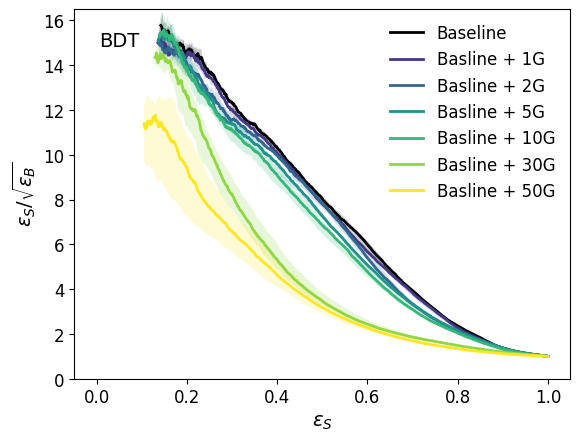

In [17]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Baseline", color=col_bas, folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_baseline_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 1G", color=colormap_gaussian(col_1G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_1G_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 2G", color=colormap_gaussian(col_2G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_2G_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 5G", color=colormap_gaussian(col_5G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_5G_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 10G", color=colormap_gaussian(col_10G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_10G_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 30G", color=colormap_gaussian(col_30G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_30G_BDT/")
import_and_plot("roc_classifier_averaging", label="Basline + 50G", color=colormap_gaussian(col_50G), folder="/home/zu992399/PhD/BackToTheRoots/results/IAD_50G_BDT/")
name="BDT_IAD_BDT_G"
plot_end(name, ylim=16.5, set_xaxis=True, title="BDT")

(1, 20898)


(50, 57101)
(-0.05, 1.05, -0.8522711030073933, 17.897693163155257)


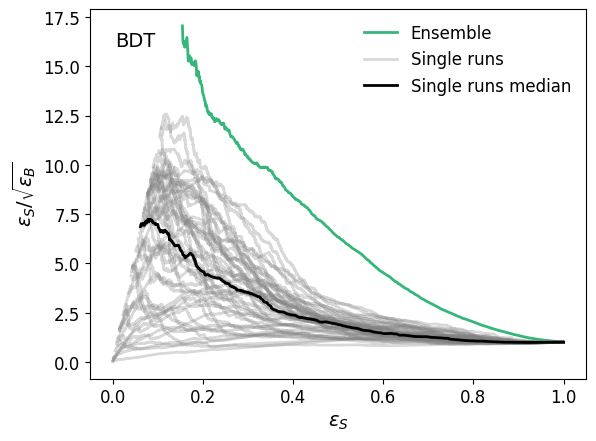

In [18]:
plot_start()
import_and_plot("roc_classifier_averaging", label="Ensemble",color=colormap_gaussian(col_10G),folder="results/IAD_10G_BDT/", N_runs=1, alpha=0)
import_and_plot_all("roc_classifier", label="Single runs",color="grey",folder="results/IAD_10G_BDT/", N_runs=50, alpha=0.3)
import_and_plot("roc_classifier", label="Single runs median",color="black",folder="results/IAD_10G_BDT/", N_runs=50, alpha=0)
name="BDT_10G_ensembling"
plot_end(name, title="BDT")

(1, 41426)
(50, 124564)
(-0.05, 1.05, -0.08964366566616581, 1.882516978989482)


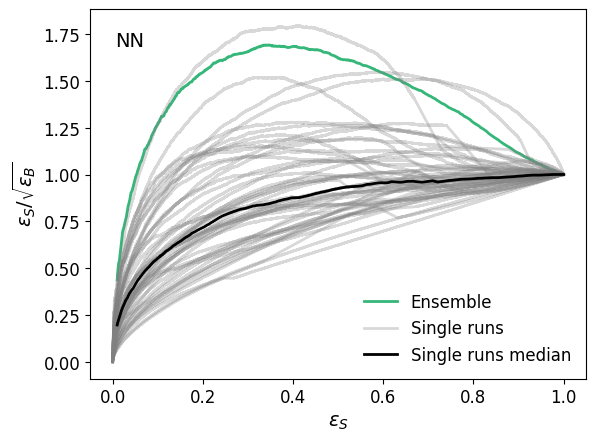

In [19]:
plot_start()
import_and_plot("50_temp", label="Ensemble",color=colormap_gaussian(col_10G),folder="results/IAD_10G_NN/", N_runs=1, alpha=0)
import_and_plot_all("roc_NN", label="Single runs",color="grey",folder="results/IAD_10G_NN/", N_runs=50, alpha=0.3)
import_and_plot("roc_NN", label="Single runs median",color="black",folder="results/IAD_10G_NN/", N_runs=50, alpha=0)
name="NN_10G_ensembling"
plot_end(name, title="NN")

# 1D plot

In [20]:
def read_ROC_SIC_1D(path, points, folder, N_runs=10, start_runs=0):
	fpr=np.load(folder+"fpr_"+path+".npy")[start_runs:start_runs+N_runs]
	print(fpr.shape)
	tpr=np.load(folder+"tpr_"+path+".npy")[start_runs:start_runs+N_runs]
	ROC_values = np.zeros((len(fpr),len(points)))
	SIC_values = np.zeros((len(fpr),len(points)+2))
	for j in range(len(ROC_values)):
		inds = np.nonzero(tpr[j])[0]
		t = tpr[j, inds]
		f = fpr[j, inds]
		ROC_values[j] = interp1d(f, 1/f)(points)
		SIC_values[j,:-2] = interp1d(f, t/np.sqrt(f))(points)
		SIC_values[j,-1] = np.nanmax(np.nan_to_num(t/np.sqrt(f), posinf=0),where= f>1/312858/max_err**2,initial=0)
		SIC_values[j,-2] = np.nanmax(np.nan_to_num(t/np.sqrt(f),posinf=0))
	return np.median(SIC_values,axis=0), np.percentile(SIC_values, 16, axis=0), np.percentile(SIC_values, 84, axis=0)

def plot_end_1D(sig, name, small=True): 

	plt.legend()
	plt.ylabel(r"$\max\ \epsilon_S/\sqrt{\epsilon_B}$")
	plt.xlabel(r"$N_{sig}$")
	plt.xticks(sig)
	plt.savefig("plots/1D_"+name+".pdf")
	plt.show()

def plot_sic(sic, sic_low, sic_upp, sig, color, label, normed=False, linestyle="solid"):
	if normed:
		n = np.max(sic)
		plt.plot(sig, sic/n, color=color,label=label, linestyle=linestyle)
		plt.fill_between(sig, sic_low/n, sic_upp/n, alpha=0.2, facecolor=color)
		return
	plt.plot(sig, sic, color=color,label=label, linestyle=linestyle)
	plt.fill_between(sig, sic_low, sic_upp, alpha=0.2, facecolor=color)

(10, 46643)


(10, 47087)
(10, 45567)
(10, 42515)
(10, 37043)
(10, 33867)
(10, 24693)
(10, 22148)
(10, 20362)
(10, 19550)
(10, 18131)
(1, 86005)
(1, 72112)
(1, 94478)
(1, 69658)
(1, 74700)
(1, 51251)
(1, 39654)
(1, 27688)
(1, 39603)
(1, 30531)
(1, 26878)
(10, 37715)
(10, 36870)
(10, 31442)
(10, 25084)
(10, 21258)
(10, 18612)
(10, 14292)
(10, 12674)
(10, 12134)
(10, 11288)
(10, 10710)
(10, 37813)
(10, 37699)
(10, 37395)
(10, 35638)
(10, 31182)
(10, 26018)
(10, 17516)
(10, 14544)
(10, 13338)
(10, 12404)
(10, 11344)


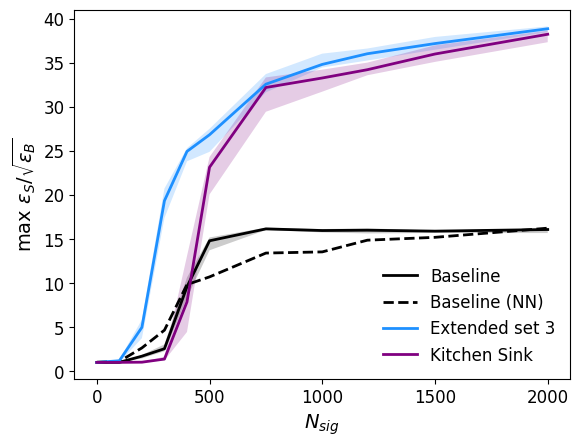

In [21]:
points = np.array([0.1,0.01])

directory = "/hpcwork/zu992399/1D_Nsig/"
directory2 = "/work/zu992399/BackToTheRoots/1D_Nsig/"

sig = np.array([0, 100, 200, 300, 400, 500, 750, 1000, 1200, 1500, 2000])#, 2500, 3000])
sig_plot = np.array([0,500,1000,1500, 2000])#, 2500, 3000])

sic = np.zeros((len(sig),len(points)+2))
sic_low = np.zeros((len(sig),len(points)+2))
sic_upp = np.zeros((len(sig),len(points)+2))

plt.figure()
for j,s in enumerate(sig):
	sic[j], sic_low[j], sic_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"baseline/Nsig_"+str(s)+"/")
plot_sic(sic[:,-1], sic_low[:,-1], sic_upp[:,-1], sig, col_bas, "Baseline")

for j,s in enumerate(sig):
	sic[j], sic_low[j], sic_upp[j] = read_ROC_SIC_1D("50_temp", points, directory2+"NN_baseline_2/Nsig_"+str(s)+"/", N_runs=1)
plot_sic(sic[:,-1], sic_low[:,-1], sic_upp[:,-1], sig, col_bas, "Baseline (NN)", linestyle="dashed")

sic_all = np.zeros((len(sig),len(points)+2))
sic_all_low = np.zeros((len(sig),len(points)+2))
sic_all_upp = np.zeros((len(sig),len(points)+2))
for j,s in enumerate(sig):
	sic_all[j], sic_all_low[j], sic_all_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"extended3/Nsig_"+str(s)+"/")
plot_sic(sic_all[:,-1], sic_all_low[:,-1], sic_all_upp[:,-1], sig, col_ex3, "Extended set 3")

sic_ks = np.zeros((len(sig),len(points)+2))
sic_ks_low = np.zeros((len(sig),len(points)+2))
sic_ks_upp = np.zeros((len(sig),len(points)+2))

"""
for j,s in enumerate(sig):
	sic_ks[j], sic_ks_low[j], sic_ks_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"kitchensink/Nsig_"+str(s)+"/")
plot_sic(sic_ks[:,-1], sic_ks_low[:,-1], sic_ks_upp[:,-1], sig, col_ks, "Kitchen Sink")
"""

for j,s in enumerate(sig):
	sic_ks[j], sic_ks_low[j], sic_ks_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"kitchensink_super/Nsig_"+str(s)+"/")
plot_sic(sic_ks[:,-1], sic_ks_low[:,-1], sic_ks_upp[:,-1], sig, col_ks, "Kitchen Sink")
plot_end_1D(sig_plot, "max_err_larger_ks")

(10, 46643)
(10, 47087)
(10, 45567)
(10, 42515)
(10, 37043)
(10, 33867)
(10, 24693)
(10, 22148)
(10, 20362)
(10, 19550)
(10, 18131)
(1, 86005)
(1, 72112)
(1, 94478)
(1, 69658)
(1, 74700)
(1, 51251)
(1, 39654)
(1, 27688)
(1, 39603)
(1, 30531)
(1, 26878)
(10, 37715)
(10, 36870)
(10, 31442)
(10, 25084)
(10, 21258)
(10, 18612)
(10, 14292)
(10, 12674)
(10, 12134)
(10, 11288)
(10, 10710)
(10, 37743)
(10, 37645)


(10, 36453)
(10, 30054)
(10, 25844)
(10, 20826)
(10, 15076)
(10, 13072)
(10, 12040)
(10, 11346)
(10, 10736)


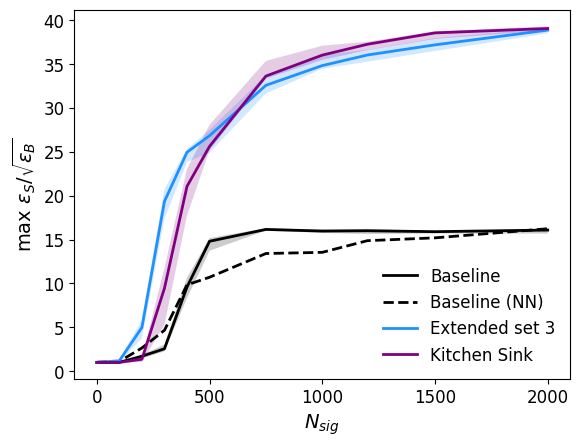

In [22]:
points = np.array([0.1,0.01])

directory = "/hpcwork/zu992399/1D_Nsig/"
directory2 = "/work/zu992399/BackToTheRoots/1D_Nsig/"

sig = np.array([0, 100, 200, 300, 400, 500, 750, 1000, 1200, 1500, 2000])#, 2500, 3000])
sig_plot = np.array([0,500,1000,1500, 2000])#, 2500, 3000])

sic = np.zeros((len(sig),len(points)+2))
sic_low = np.zeros((len(sig),len(points)+2))
sic_upp = np.zeros((len(sig),len(points)+2))

plt.figure()
for j,s in enumerate(sig):
	sic[j], sic_low[j], sic_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"baseline/Nsig_"+str(s)+"/")
plot_sic(sic[:,-1], sic_low[:,-1], sic_upp[:,-1], sig, col_bas, "Baseline")

for j,s in enumerate(sig):
	sic[j], sic_low[j], sic_upp[j] = read_ROC_SIC_1D("50_temp", points, directory2+"NN_baseline_2/Nsig_"+str(s)+"/", N_runs=1)
plot_sic(sic[:,-1], sic_low[:,-1], sic_upp[:,-1], sig, col_bas, "Baseline (NN)", linestyle="dashed")

sic_all = np.zeros((len(sig),len(points)+2))
sic_all_low = np.zeros((len(sig),len(points)+2))
sic_all_upp = np.zeros((len(sig),len(points)+2))
for j,s in enumerate(sig):
	sic_all[j], sic_all_low[j], sic_all_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"extended3/Nsig_"+str(s)+"/")
plot_sic(sic_all[:,-1], sic_all_low[:,-1], sic_all_upp[:,-1], sig, col_ex3, "Extended set 3")

sic_ks = np.zeros((len(sig),len(points)+2))
sic_ks_low = np.zeros((len(sig),len(points)+2))
sic_ks_upp = np.zeros((len(sig),len(points)+2))


for j,s in enumerate(sig):
	sic_ks[j], sic_ks_low[j], sic_ks_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"kitchensink/Nsig_"+str(s)+"/")
plot_sic(sic_ks[:,-1], sic_ks_low[:,-1], sic_ks_upp[:,-1], sig, col_ks, "Kitchen Sink")
"""
for j,s in enumerate(sig):
	sic_ks[j], sic_ks_low[j], sic_ks_upp[j] = read_ROC_SIC_1D("roc_classifier_averaging", points, directory2+"kitchensink_super/Nsig_"+str(s)+"/")
plot_sic(sic_ks[:,-1], sic_ks_low[:,-1], sic_ks_upp[:,-1], sig, col_ks, "Kitchen Sink")
"""
plot_end_1D(sig_plot, "max_err_smaller_ks")

# 2D Scan

In [23]:
from matplotlib import colors

def plot_err(arr, arr_err, x, bkg_str, y, sig_str, name, vmin=None, vmax=None, label= r"max $\epsilon_S/\sqrt{\epsilon_B}$", ylabel=r"$N_{sig}/N_{bkg}$"):
	fig, ax= plt.subplots(2,1)#, sharex=True)
	plot = ax[0].imshow(arr.T,cmap=colormap_2D, vmin =vmin, vmax=vmax, aspect="auto")
	cb = plt.colorbar(plot, ax=ax[0],location="right", label=label)
	#cb.set_label(label=label, labelpad=20)
	
	#plt.xticks(y,bkg_str)
	#plt.xlabel(r"$N_{bkg}$")
	ax[0].set_yticks(y, sig_str_plot)
	ax[0].set_xticks(x, bkg_str)
	ax[0].set_ylabel(ylabel)
	#ax[0].savefig("plots/2D/"+name+".pdf")

	plot_err = ax[1].imshow(arr_err.T,cmap=colormap_2D, vmin =None, vmax=None, aspect="auto")
	cb= plt.colorbar(plot_err, ax=ax[1],location="right", label="standard deviation")
	#cb.set_label(label="standard deviation", labelpad=20)
	ax[1].set_xticks(x, bkg_str)
	ax[1].set_xlabel(r"$N_{bkg}$")
	ax[1].set_yticks(y, sig_str_plot)
	ax[1].set_ylabel(ylabel)
	plt.savefig("plots/final/2D_"+name+".pdf")

def plot_2D(arr, arr_err, x, bkg_str, y, sig_str, name, vmin=None, vmax=None, label= r"max $\epsilon_S/\sqrt{\epsilon_B}$", ylabel=r"$N_{sig}/N_{bkg}$", normed=False, logscale=False):
	plt.figure()
	if normed:
		m = np.max(arr)
		print(m) 
		arr/=m
		vmin=0
		vmax=1
	if logscale:
		plt.imshow(arr.T,cmap=colormap_2D, aspect="auto", norm=colors.LogNorm(vmin=vmin, vmax=vmax))
	else:
		plt.imshow(arr.T,cmap=colormap_2D, vmin =vmin, vmax=vmax, aspect="auto")
	cb = plt.colorbar(location="right", label=label)

	plt.yticks(y, sig_str_plot)
	plt.xticks(x, bkg_str)
	plt.ylabel(ylabel)
	plt.xlabel(r"$N_{bkg}$")
	plt.savefig("plots/2D_"+name+".pdf")
	return np.max(arr)



def read_ROC_SIC(path, points, folder, N_runs=10, start_runs=0):
	fpr=np.load(folder+"fpr_"+path+".npy", allow_pickle=True)[start_runs:start_runs+N_runs]
	#print(fpr.shape)
	a = 10-fpr.shape[0]
	tpr=np.load(folder+"tpr_"+path+".npy", allow_pickle=True)[start_runs:start_runs+N_runs]
	ROC_values = np.zeros((len(fpr),len(points)))
	SIC_values = np.zeros((len(fpr),len(points)+2))
	for j in range(len(ROC_values)):
		inds = np.nonzero(tpr[j])[0]
		#print(inds)
		t = tpr[j, inds]
		f = fpr[j, inds]
		ROC_values[j] = interp1d(t, 1/f)(points)
		SIC_values[j,:-2] = interp1d(t, t/np.sqrt(f))(points)
		#print(np.where(tpr[j]!=0).shape)
		#N = 1000#int(np.sqrt(len(np.nonzero(tpr[j]))))
		#print(len(t))
		SIC_values[j,-1] = np.nanmax(np.nan_to_num(t/np.sqrt(f), posinf=0),where= f>1/312858/max_err**2,initial=0)
		SIC_values[j,-2] = np.nanmax(np.nan_to_num(t/np.sqrt(f),posinf=0))
		#print(SIC_values[j])
	return np.median(SIC_values,axis=0), np.std(SIC_values, axis=0), a

In [24]:
points = np.array([0.2,0.3,0.5])

directory = "/work/zu992399/BackToTheRoots/2D_scan/"
directory_IAD = directory+ "IAD/"


sig = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])[::-1]
sig_str_plot = [str(sig[i])+"$\sigma$" for i in np.array(range(0,5))*2]
bkg = np.array([25000*i for i in range(1,9)])
bkg_str = np.array([str(int(b/1000))+"k" for b in [50000, 100000, 150000, 200000]])
x=np.array(range(0,len(bkg_str)))*2+1
y=np.array(range(0,5))*2

sic = np.zeros((len(bkg),len(sig),len(points)+2))
sic_err = np.zeros((len(bkg),len(sig),len(points)+2))

15.5844106853162


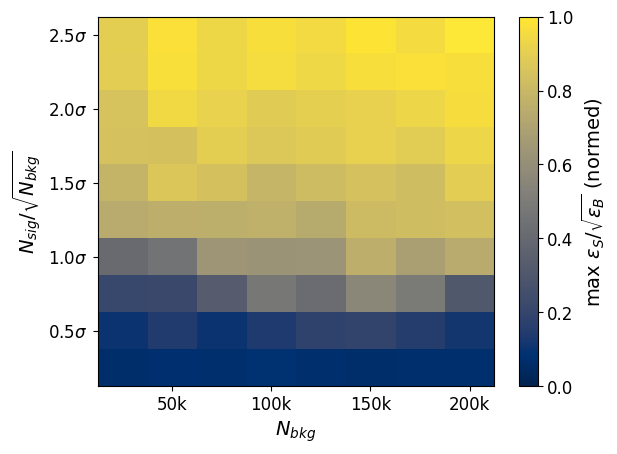

In [31]:

for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j],a = read_ROC_SIC("roc_classifier_averaging", points, directory+"baseline/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "baseline", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", normed=True, label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normed)")

36.76643930174053


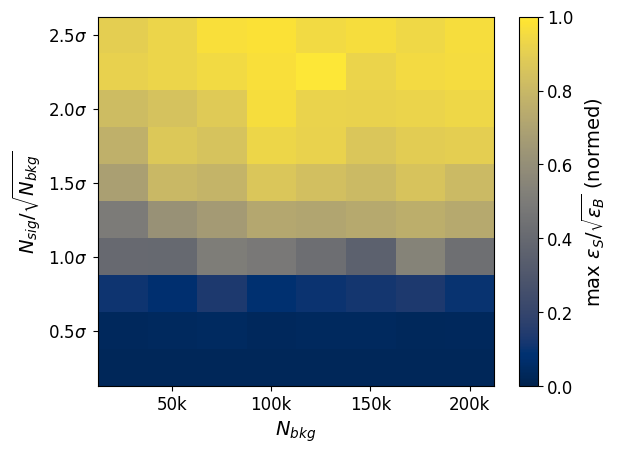

In [32]:

for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j],a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_smaller", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normed)", normed=True)


34.09972918304693


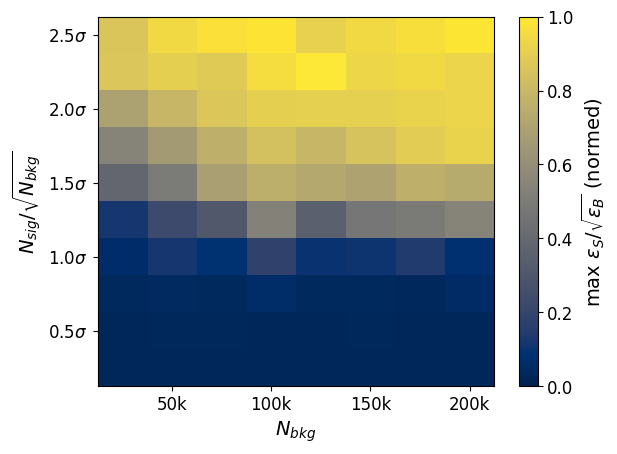

In [33]:

for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j],a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink_super/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_larger", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normed)", normed=True)



0
22
20


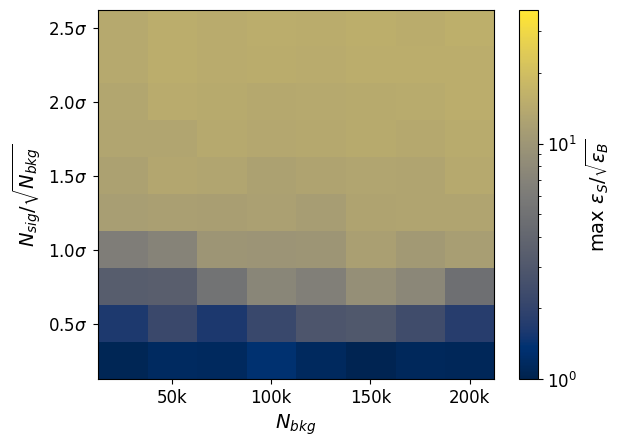

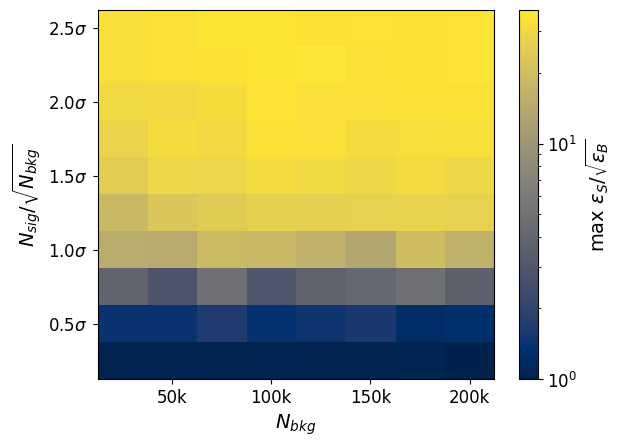

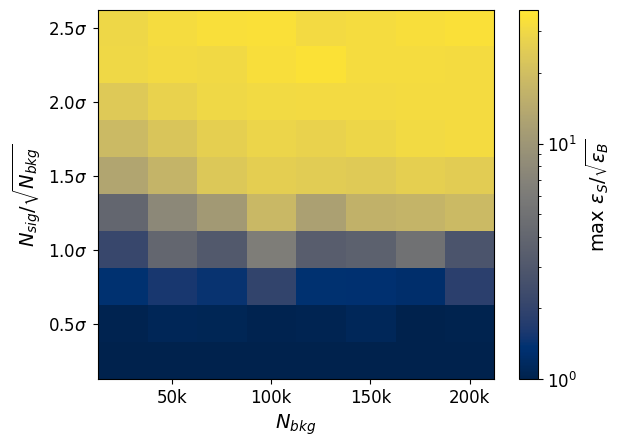

In [34]:
k=0
for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j], a = read_ROC_SIC("roc_classifier_averaging", points, directory+"baseline/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
		k+=a
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "baseline_log", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", logscale=True, vmax=37, vmin=1)
print(k)

k=0
for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j],a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
		k+=a
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_smaller_log", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", logscale=True, vmax=37, vmin=1)
print(k)

k=0
for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j],a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink_super/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
		k+=a
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_larger_log", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", logscale=True, vmax=37, vmin=1)
print(k)

15.5844106853162
36.76643930174053
34.09972918304693


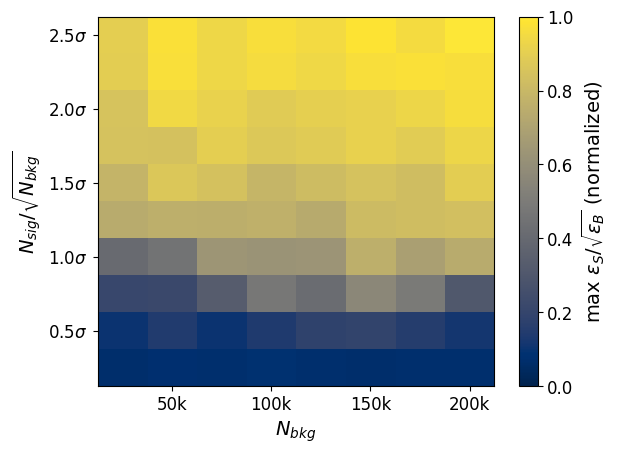

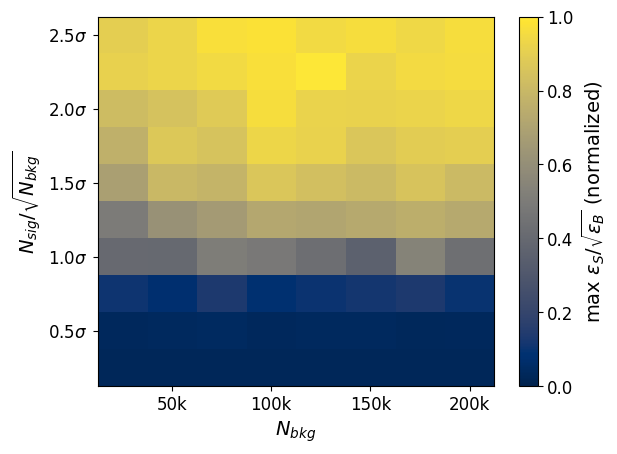

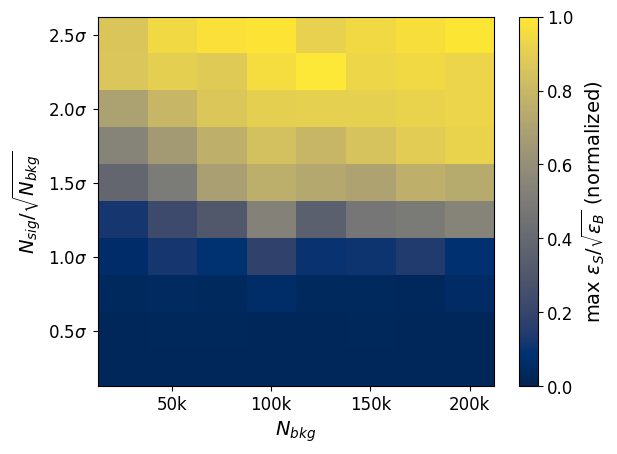

In [35]:
for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j], a = read_ROC_SIC("roc_classifier_averaging", points, directory+"baseline/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "baseline_normed", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normalized)", normed=True)

for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j], a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_smaller_normed", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normalized)", normed=True)

for i, b in enumerate(bkg):
	for j,s in enumerate(sig):
		sic[i,j], sic_err[i,j], a = read_ROC_SIC("roc_classifier_averaging", points, directory+"kitchensink_super/"+str(b)+"_"+str(b)+"_"+str(s)+"/")
vmax = plot_2D(sic[:,:,-1],sic_err[:,:,-1], x, bkg_str, y, sig_str_plot, "kitchensink_larger_normed", ylabel=r"$N_{sig}/\sqrt{N_{bkg}}$", label= r"max $\epsilon_S/\sqrt{\epsilon_B}$ (normalized)", normed=True)
